<a href="https://colab.research.google.com/github/wanmwas30-ops/sports-person-classifier-project/blob/main/Project_1(Predicting_car_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df1=pd.read_csv('cardekho.csv')
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [ ]:
df1.shape

(8128, 12)

In [ ]:
df1.groupby('name')['name'].agg('count').sort_values(ascending=False)

,name
name,
Maruti Swift Dzire VDI,129
Maruti Alto 800 LXI,82
Maruti Alto LXi,71
BMW X4 M Sport X xDrive20d,62
Maruti Swift VDI,61
...,...
BMW 5 Series 523i,1
BMW 5 Series 525d,1
Volkswagen Vento Petrol Highline AT,1


In [ ]:
df1_grouped= df1.groupby('name')
len(df1_grouped)

2058

In [ ]:
counts= df1.groupby('name').size()
counts[counts==1]

,0
name,
Ambassador CLASSIC 1500 DSL AC,1
Ambassador Classic 2000 DSZ AC PS,1
Ambassador Grand 1500 DSZ BSIII,1
Ambassador Grand 2000 DSZ PW CL,1
Ashok Leyland Stile LE,1
...,...
Volkswagen Vento Petrol Trendline,1
Volvo S90 D4 Inscription BSIV,1
Volvo V40 Cross Country D3,1


In [ ]:
counts=df1.name.value_counts()
df1['name_update'] = df1['name'].mask(df1['name'].map(counts) == 1, 'Other')
df1['name_update'].value_counts()

,count
name_update,
Other,823
Maruti Swift Dzire VDI,129
Maruti Alto 800 LXI,82
Maruti Alto LXi,71
BMW X4 M Sport X xDrive20d,62
...,...
Mahindra Marazzo M2 8Str BSIV,2
Honda CR-V 2.0L 2WD AT,2
Maruti Ritz VDi ABS,2


In [ ]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,name_update
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,Maruti Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,Honda City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,Other
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,Maruti Swift VXI BSIII


In [ ]:
df2= df1.drop('name', axis=1)
df2.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,name_update
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,Maruti Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,Honda City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,Other
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,Maruti Swift VXI BSIII


In [ ]:
df2.isnull().sum()

,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),221
engine,221
max_power,215


In [ ]:
df3= df2 = df2.fillna(df2.mean(numeric_only=True))
df3.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,name_update
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,Maruti Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,Honda City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,Other
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,Maruti Swift VXI BSIII


In [ ]:
df3.isnull().sum()
df4= df3.dropna()
df4.isnull().sum()

,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),0
engine,0
max_power,0


In [ ]:
df4.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [ ]:
df4.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,name_update
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,Maruti Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,Honda City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,Other
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,Maruti Swift VXI BSIII


In [ ]:
df4.name_update.unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Maruti S-Presso VXI AT',
       'Honda City i VTEC SV', 'Ford Freestyle Titanium Plus Diesel BSIV'],
      dtype=object)

In [ ]:
df4.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,7913.000000,7.913000e+03,7.913000e+03,7913.000000,7913.000000,7913.000000
mean,2013.981676,6.495103e+05,6.919285e+04,19.418783,1458.625016,5.416719
std,3.865901,8.133054e+05,5.677175e+04,4.035614,503.725196,0.959224
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.900000e+05,9.600000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [ ]:
df4.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,name_update
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,Maruti Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,Honda City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,Other
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,Maruti Swift VXI BSIII


<Axes: >

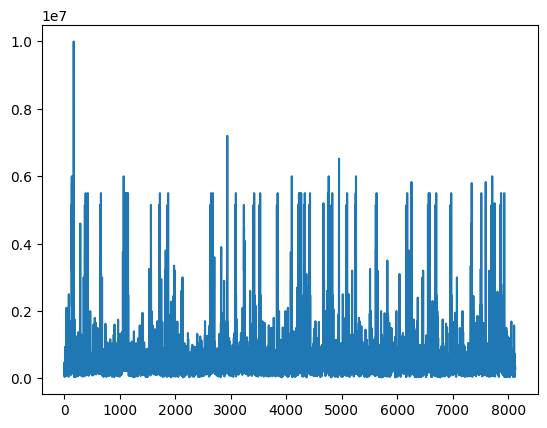

In [ ]:
df2.selling_price.plot()

In [ ]:
dummies1=pd.get_dummies(df4.fuel).astype(int)
dummies1.head()

,CNG,Diesel,LPG,Petrol
0,0,1,0,0
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,0,0,1


In [ ]:
df5= pd.concat([df4, dummies1.drop('Petrol', axis='columns')], axis=1)
df5.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,name_update,CNG,Diesel,LPG
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,Maruti Swift Dzire VDI,0,1,0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda Rapid 1.5 TDI Ambition,0,1,0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,Honda City 2017-2020 EXi,0,0,0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,Other,0,1,0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,Maruti Swift VXI BSIII,0,0,0


In [ ]:
df5.drop('fuel', axis=1, inplace=True)
df5.head()

,year,selling_price,km_driven,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,name_update,CNG,Diesel,LPG
0,2014,450000,145500,Individual,Manual,First Owner,23.40,1248.0,74,5.0,Maruti Swift Dzire VDI,0,1,0
1,2014,370000,120000,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda Rapid 1.5 TDI Ambition,0,1,0
2,2006,158000,140000,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,Honda City 2017-2020 EXi,0,0,0
3,2010,225000,127000,Individual,Manual,First Owner,23.00,1396.0,90,5.0,Other,0,1,0
4,2007,130000,120000,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,Maruti Swift VXI BSIII,0,0,0


In [ ]:
dummies2=pd.get_dummies(df4.seller_type).astype(int)
dummies2.head()

,Dealer,Individual,Trustmark Dealer
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [ ]:
df6= pd.concat([df5, dummies2.drop('Dealer', axis='columns')], axis=1)
df6.head()

,year,selling_price,km_driven,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,name_update,CNG,Diesel,LPG,Individual,Trustmark Dealer
0,2014,450000,145500,Individual,Manual,First Owner,23.40,1248.0,74,5.0,Maruti Swift Dzire VDI,0,1,0,1,0
1,2014,370000,120000,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda Rapid 1.5 TDI Ambition,0,1,0,1,0
2,2006,158000,140000,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,Honda City 2017-2020 EXi,0,0,0,1,0
3,2010,225000,127000,Individual,Manual,First Owner,23.00,1396.0,90,5.0,Other,0,1,0,1,0
4,2007,130000,120000,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,Maruti Swift VXI BSIII,0,0,0,1,0


In [ ]:
dummies3=pd.get_dummies(df6.transmission).astype(int)
dummies3.head()

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
df7= pd.concat([df6, dummies3.drop('Manual', axis='columns')], axis=1)
df7.head()

,year,selling_price,km_driven,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,name_update,CNG,Diesel,LPG,Individual,Trustmark Dealer,Automatic
0,2014,450000,145500,Individual,Manual,First Owner,23.40,1248.0,74,5.0,Maruti Swift Dzire VDI,0,1,0,1,0,0
1,2014,370000,120000,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda Rapid 1.5 TDI Ambition,0,1,0,1,0,0
2,2006,158000,140000,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,Honda City 2017-2020 EXi,0,0,0,1,0,0
3,2010,225000,127000,Individual,Manual,First Owner,23.00,1396.0,90,5.0,Other,0,1,0,1,0,0
4,2007,130000,120000,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,Maruti Swift VXI BSIII,0,0,0,1,0,0


In [ ]:
dummies4=pd.get_dummies(df7.owner).astype(int)
dummies4.head()

,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,1,0,0,0,0


In [ ]:
df8= pd.concat([df7, dummies4.drop('Second Owner', axis='columns')], axis=1)
df8.head()

,year,selling_price,km_driven,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,...,CNG,Diesel,LPG,Individual,Trustmark Dealer,Automatic,First Owner,Fourth & Above Owner,Test Drive Car,Third Owner
0,2014,450000,145500,Individual,Manual,First Owner,23.40,1248.0,74,5.0,...,0,1,0,1,0,0,1,0,0,0
1,2014,370000,120000,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,...,0,1,0,1,0,0,0,0,0,0
2,2006,158000,140000,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,...,0,0,0,1,0,0,0,0,0,1
3,2010,225000,127000,Individual,Manual,First Owner,23.00,1396.0,90,5.0,...,0,1,0,1,0,0,1,0,0,0
4,2007,130000,120000,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
df8.drop(['seller_type', 'transmission', 'owner'], axis=1, inplace=True)
df8.head()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,name_update,CNG,Diesel,LPG,Individual,Trustmark Dealer,Automatic,First Owner,Fourth & Above Owner,Test Drive Car,Third Owner
0,2014,450000,145500,23.40,1248.0,74,5.0,Maruti Swift Dzire VDI,0,1,0,1,0,0,1,0,0,0
1,2014,370000,120000,21.14,1498.0,103.52,5.0,Skoda Rapid 1.5 TDI Ambition,0,1,0,1,0,0,0,0,0,0
2,2006,158000,140000,17.70,1497.0,78,5.0,Honda City 2017-2020 EXi,0,0,0,1,0,0,0,0,0,1
3,2010,225000,127000,23.00,1396.0,90,5.0,Other,0,1,0,1,0,0,1,0,0,0
4,2007,130000,120000,16.10,1298.0,88.2,5.0,Maruti Swift VXI BSIII,0,0,0,1,0,0,1,0,0,0


In [ ]:
dummies5=pd.get_dummies(df8.name_update).astype(int)
dummies5.head()

,Audi A3 35 TDI Premium Plus,Audi A4 2.0 TDI,Audi A4 35 TDI Premium Plus,Audi A6 35 TFSI Matrix,Audi Q3 2.0 TDI Quattro Premium Plus,Audi Q5 3.0 TDI Quattro,Audi Q5 35TDI Premium Plus,Audi Q7 3.0 TDI Quattro,BMW 3 Series 320d GT Luxury Line,BMW 3 Series 320d Highline,...,Volkswagen Vento 1.5 TDI Highline AT,Volkswagen Vento 1.6 Highline,Volkswagen Vento Diesel Comfortline,Volkswagen Vento Diesel Highline,Volkswagen Vento Diesel Trendline,Volkswagen Vento Petrol Highline,Volvo S60 D4 SUMMUM,Volvo V40 D3 R-Design,Volvo XC40 D4 Inscription BSIV,Volvo XC40 D4 R-Design
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df9= pd.concat([df8, dummies5.drop('Audi A3 35 TDI Premium Plus', axis='columns')], axis=1)
df9.head()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,name_update,CNG,Diesel,...,Volkswagen Vento 1.5 TDI Highline AT,Volkswagen Vento 1.6 Highline,Volkswagen Vento Diesel Comfortline,Volkswagen Vento Diesel Highline,Volkswagen Vento Diesel Trendline,Volkswagen Vento Petrol Highline,Volvo S60 D4 SUMMUM,Volvo V40 D3 R-Design,Volvo XC40 D4 Inscription BSIV,Volvo XC40 D4 R-Design
0,2014,450000,145500,23.40,1248.0,74,5.0,Maruti Swift Dzire VDI,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2014,370000,120000,21.14,1498.0,103.52,5.0,Skoda Rapid 1.5 TDI Ambition,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2006,158000,140000,17.70,1497.0,78,5.0,Honda City 2017-2020 EXi,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010,225000,127000,23.00,1396.0,90,5.0,Other,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2007,130000,120000,16.10,1298.0,88.2,5.0,Maruti Swift VXI BSIII,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df9.drop('name_update', axis=1, inplace=True)
df9.head()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,CNG,Diesel,LPG,...,Volkswagen Vento 1.5 TDI Highline AT,Volkswagen Vento 1.6 Highline,Volkswagen Vento Diesel Comfortline,Volkswagen Vento Diesel Highline,Volkswagen Vento Diesel Trendline,Volkswagen Vento Petrol Highline,Volvo S60 D4 SUMMUM,Volvo V40 D3 R-Design,Volvo XC40 D4 Inscription BSIV,Volvo XC40 D4 R-Design
0,2014,450000,145500,23.40,1248.0,74,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,370000,120000,21.14,1498.0,103.52,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2006,158000,140000,17.70,1497.0,78,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010,225000,127000,23.00,1396.0,90,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2007,130000,120000,16.10,1298.0,88.2,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df9.shape

(7913, 1214)

In [ ]:
X= df11.drop('selling_price', axis=1)
y= df11.selling_price

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=10)
X_train.head()

,year,km_driven,mileage(km/ltr/kg),engine,max_power,seats,CNG,Diesel,LPG,Individual,...,Volkswagen Vento 1.5 TDI Highline AT,Volkswagen Vento 1.6 Highline,Volkswagen Vento Diesel Comfortline,Volkswagen Vento Diesel Highline,Volkswagen Vento Diesel Trendline,Volkswagen Vento Petrol Highline,Volvo S60 D4 SUMMUM,Volvo V40 D3 R-Design,Volvo XC40 D4 Inscription BSIV,Volvo XC40 D4 R-Design
4799,2016,30000,22.69,1995.0,190.0,5.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1244,2009,120000,19.70,796.0,46.3,5.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3300,2012,69000,17.50,1298.0,85.8,5.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
291,2017,35000,18.90,1197.0,82.0,5.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8126,2013,25000,23.57,1396.0,70.0,5.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df10.select_dtypes(include='object').columns
df10.max_power= pd.to_numeric(df10['max_power'], errors='coerce')

In [ ]:
df11=df10.dropna()

In [ ]:
X_train.dtypes

,0
year,int64
km_driven,int64
mileage(km/ltr/kg),float64
engine,float64
max_power,float64
...,...
Volkswagen Vento Petrol Highline,int64
Volvo S60 D4 SUMMUM,int64
Volvo V40 D3 R-Design,int64
Volvo XC40 D4 Inscription BSIV,int64


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.score(X_test, y_test)

0.8141344270314471

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85472427, 0.92198449, 0.80258102, 0.82408614, 0.88244627])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB

In [ ]:
def find_best_model_using_gridsearchcv(X,y):
  algos= {
      'linear_regression': {
          'model': LinearRegression(),
          'params': {
              'fit_intercept': [True, False]
          }
      },
      'lasso': {
          'model': Lasso(max_iter=100, alpha=10),
          'params': {
              'alpha': [1,2],
              'selection': ['random', 'cyclic']
          }
      },
      'decision_tree': {
          'model': DecisionTreeRegressor(),
          'params': {
              'criterion': ['friedman_mse'],
              'splitter': ['best', 'random']
          }
      },
      'random_forest': {
          'model': RandomForestRegressor(),
          'params': {
              'n_estimators': [1,5,10]
          }
      },
      'gaussian_nb': {
          'model': GaussianNB(),
          'params': {

          }
      }
  }
  scores=[]
  cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for name, config in algos.items():
    gs=GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(X,y)
    scores.append({
        'model': name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })
  return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [ ]:
find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.218e+13, tolerance: 4.284e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.870e+13, tolerance: 3.989e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.195e+13, tolerance: 4.298e

,model,best_score,best_params
0,linear_regression,0.857164,{'fit_intercept': True}
1,lasso,0.928770,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.939591,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,random_forest,0.961360,{'n_estimators': 10}
4,gaussian_nb,0.081744,{}


In [ ]:
rf=RandomForestRegressor(n_estimators=20)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9403574013176301

In [ ]:
df2.head(3)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,name_update
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,Maruti Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,Honda City 2017-2020 EXi


In [ ]:
df1.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,name_update
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,Maruti Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda Rapid 1.5 TDI Ambition


In [ ]:
def predict_selling_price(year, km_driven, fuel, seller_type, transmission, owner, name):
  try:
      fuel_index = np.where(X.columns == fuel)[0][0]
  except IndexError:
      fuel_index = -1
  try:
      seller_type_index = np.where(X.columns == seller_type)[0][0]
  except IndexError:
      seller_type_index = -1
  try:
      owner_index = np.where(X.columns == owner)[0][0]
  except IndexError:
      owner_index = -1
  try:
      name_update_index = np.where(X.columns == name)[0][0]
  except IndexError:
      name_update_index = -1
  try:
      transmission_index = np.where(X.columns == transmission)[0][0]
  except IndexError:
      transmission_index = -1

  x=np.zeros(len(X.columns))
  x[0]=year
  x[1]=km_driven
  x[2]=fuel_index
  x[3]=seller_type_index
  x[4]=transmission_index
  x[5]=owner_index
  x[6]=name_update_index

  indices = [fuel_index, seller_type_index, owner_index, name_update_index, transmission_index]

  for idx in indices:
    if idx <= 0:
        x[idx] = 1


  return rf.predict([x])[0]

In [ ]:
predict_selling_price(2018, 100000, 'Diesel', 'Individual', 'Manual', 'First Owner', 'Maruti Swift Dzire VDI')

np.float64(615250.0)

In [ ]:
import pickle
with open ('Car Prices', 'wb') as f:
    pickle.dump(rf, f)

In [ ]:
import json
columns= {
    'data_columns':[col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))